In [6]:
from sktime_estimator_evaluation.evaluation._result_evaluation import (
    CLUSTER_METRIC_CALLABLES,
    evaluate_metric_results,
    evaluate_raw_results,
)
from sktime_estimator_evaluation.evaluation._utils import metric_result_to_summary
from sktime_estimator_evaluation.evaluation.diagrams import (
    critical_difference_diagram,
    scatter_diagram,
)

In [7]:
results = evaluate_raw_results(
    experiment_name="averaging_results",
    path="C:\\Users\\chris\\Documents\\Phd\\Result\\averaging-results",
    output_dir="out/",
    metrics=CLUSTER_METRIC_CALLABLES,
)

evaluating estimator:  kmeans_dba
----> evaluating experiment:  kmeans-dtw
----> evaluating experiment:  kmeans-msm


In [8]:
summary_test, summary_train = metric_result_to_summary(results, split="both")

In [9]:
print(summary_test.groupby("estimator").mean())
print("\n\nTotal train results", len(summary_test.estimator))
print("msm problems", len(summary_test[summary_test.estimator == "kmeans-msm"]))
print("dtw problems", len(summary_test[summary_test.estimator == "kmeans-dtw"]))

                  RI       AMI       NMI       ARI        MI       ACC
estimator                                                             
kmeans-dtw  0.656902  0.260860  0.286082  0.236740  0.367373  0.319893
kmeans-msm  0.653441  0.266788  0.284693  0.255653  0.357122  0.378966


Total train results 122
msm problems 57
dtw problems 65


In [5]:
print(summary_train.groupby("estimator").mean())
print("\n\nTotal train results", len(summary_train.estimator))
print("msm problems", len(summary_train[summary_train.estimator == "kmeans-msm"]))
print("dtw problems", len(summary_train[summary_train.estimator == "kmeans-dtw"]))

                  RI       AMI       NMI       ARI        MI       ACC
estimator                                                             
kmeans-dtw  0.654732  0.262472  0.305201  0.243577  0.379560  0.328929
kmeans-msm  0.668607  0.292260  0.335008  0.284799  0.412877  0.361768


Total train results 113
msm problems 53
dtw problems 60


In [6]:
import platform


def _default_format_reader(path: str):
    if "Windows" in platform.platform():
        split_subdir = path.split("\\")
    else:
        split_subdir = path.split("/")
    metric_name = split_subdir[-1].split(".")[0]
    split_temp = split_subdir[-1].split("_")
    split = "train"
    if "TEST" in split_temp[0]:
        split = "test"
    estimator_name = split_subdir[-2]
    return estimator_name, metric_name, split

In [7]:
# other results
distance_results = evaluate_metric_results(
    "C:\\Users\\chris\\Documents\\Phd\\repos\\distance-based-time-series-clustering\\results",
    _default_format_reader,
)
distance_result_summary = metric_result_to_summary(distance_results)
distance_result_summary.groupby("estimator").mean()

AttributeError: 'tuple' object has no attribute 'groupby'

[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

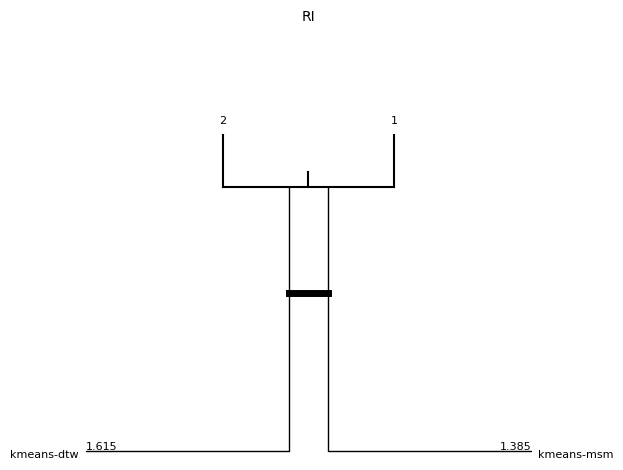

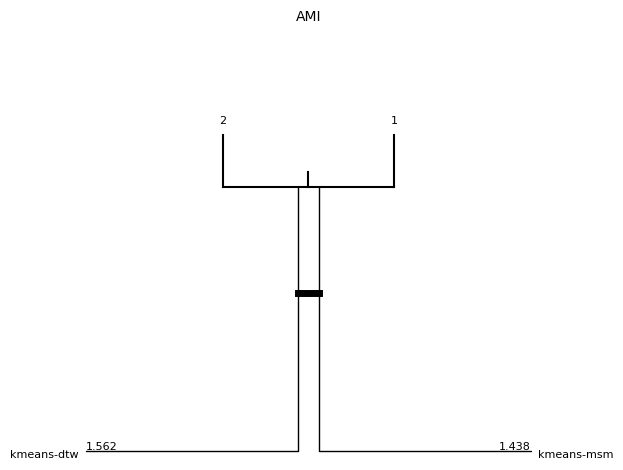

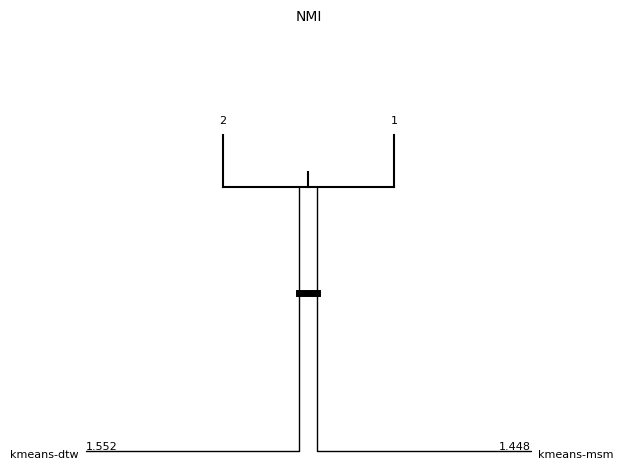

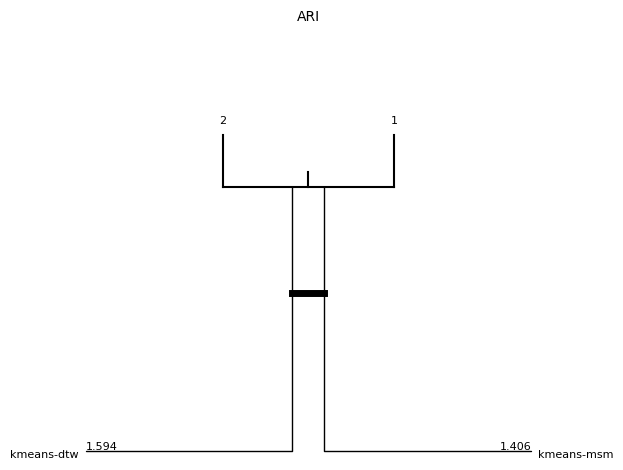

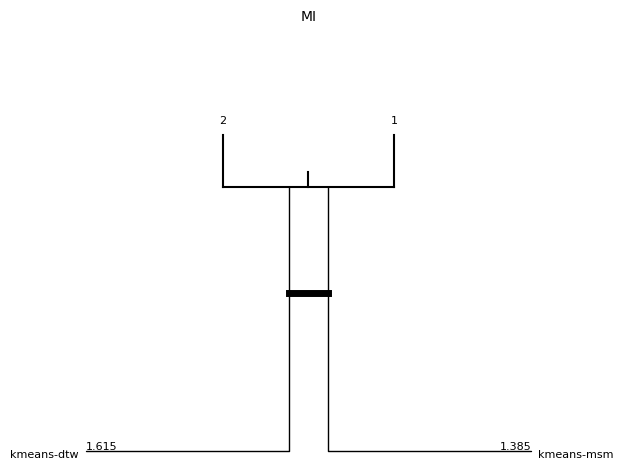

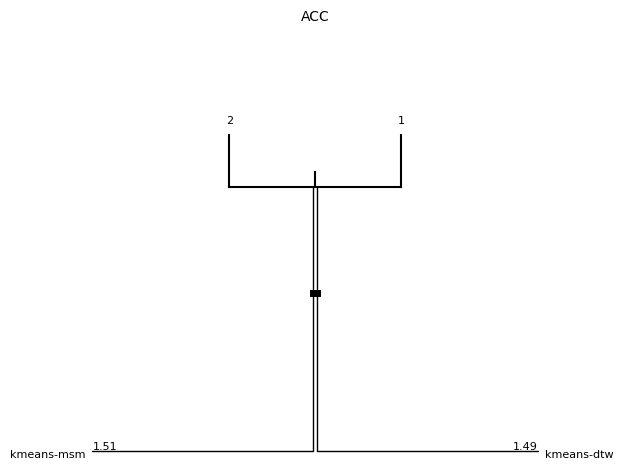

In [8]:
critical_difference_diagram(summary_test)